\newpage

## Question 1

The classification problem is to predict whether a patient has heart disease based on the described medical attributes including variables such as sex, age, blood pressure, etc. Using the UCI Heart Disease Dataset, we can train a machine learning model to classify individuals into two categories. The first category being class 0 with no presence of heart diesease and the second being class 1 with presence of heart disease.

## Question 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import rand_score

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
data = fetch_ucirepo(id=45) 
df = data.data.original
print(df.head)

: 

In [ ]:
# Apply transformation 
scaler = StandardScaler()
df = pd.DataFrame(
    scaler.fit_transform(df), 
    index=df.index, 
    columns=df.columns
    )

print(df.head)

## Question 3

In [ ]:
print(df.shape)
var_inf = data.variables
print(var_inf) 

In [ ]:
print(df.dtypes)

The dataset has 303 observations and 14 variables including age, sex, chest pain type (cp), resting blood pressure (trestbps), serum cholesterol (chol), fasting blood sugar (fbs), resting electrocardiographic results (restecg), maximum heart rate achieved (thalach), exercise induced angina (exang), depression induced by exercise relative to rest (oldpeak), slope of the peak exercise ST segment (slope), number of major vessels colored by fluoroscopy (ca), thalassemia (thal), and the target variable diagnosis of heart disease (num). There are both discrete and continous numerical variables as they are listed as integer and float. There are also categorical variables, including our target variable (num).

## Question 4

In [ ]:
df['num'] = df['num'].apply(lambda x: 0 if x >= 0 else 1)
df['num'] = df['num'].astype('category')
print(df.head())

## Question 5

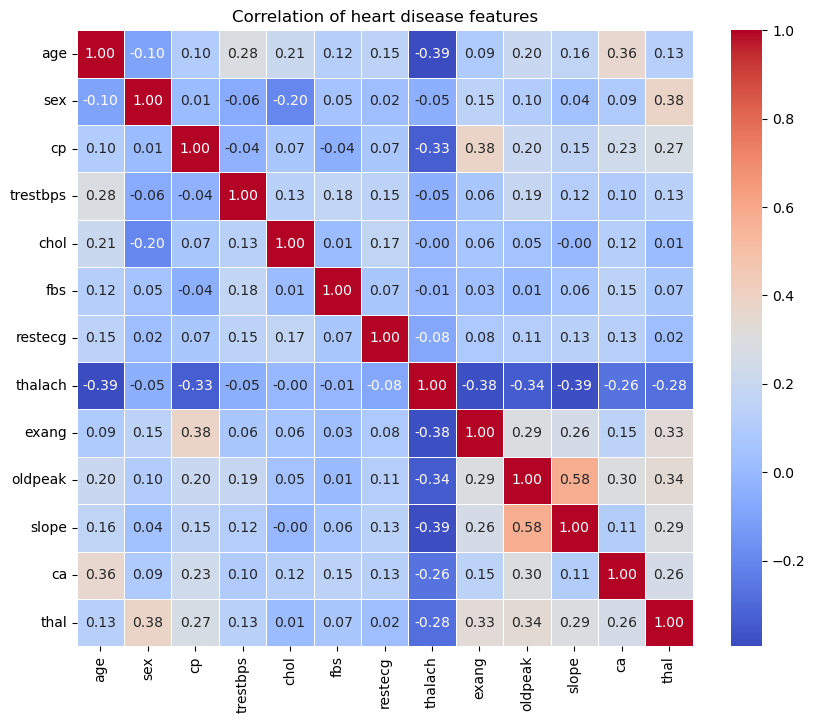

In [ ]:
import seaborn as sns

numerical_vars = df.select_dtypes(include=[np.number])
scaler = StandardScaler()
numerical_vars_scaled = pd.DataFrame(scaler.fit_transform(numerical_vars), 
                                     columns=numerical_vars.columns)
corr_matrix = numerical_vars_scaled.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, linewidths=.5)

plt.title('Correlation of heart disease features')
plt.show()

It looks like the variables oldpeak (exercise-induced depression) and slope (slope of the peak exercise ST segment) are correlated because both are related to how the heart responds to exercise. It also looks like Thalach (maximum heart rate achieved during exercise) is negatively correlated with the other variables because individuals with heart disease or poor heart health typically have a lower maximum heart rate due to impaired heart function under stress.

## Question 6

In [ ]:
# Check for missing variables
print(df.isnull().sum())

# Drop missing values
df = df.dropna()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [ ]:
# Check again
print(df.isnull().sum())

df.shape

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


(297, 14)

There are 297 observations after dropping the missing values.

## Question 7


In [ ]:
df2 = df.copy()

clust_df = df2.select_dtypes(include=[np.number])
if 'num' in clust_df.columns:
    clust_df = clust_df.drop(columns=['num'])
print(clust_df.head())

scaler = StandardScaler()
clust_df_scaled = scaler.fit_transform(clust_df)
clust_df_scaled = pd.DataFrame(clust_df_scaled, columns=clust_df.columns)
print(clust_df_scaled.head())

        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.948726  0.686202 -2.251775  0.757525 -0.264900  2.394438  1.016684   
1  1.392002  0.686202  0.877985  1.611220  0.760415 -0.417635  1.016684   
2  1.392002  0.686202  0.877985 -0.665300 -0.342283 -0.417635  1.016684   
3 -1.932564  0.686202 -0.165268 -0.096170  0.063974 -0.417635 -0.996749   
4 -1.489288 -1.457296 -1.208521 -0.096170 -0.825922 -0.417635  1.016684   

    thalach     exang   oldpeak     slope        ca      thal  
0  0.017197 -0.696631  1.087338  2.274579 -0.718306  0.653650  
1 -1.821905  1.435481  0.397182  0.649113  2.487269 -0.895552  
2 -0.902354  1.435481  1.346147  0.649113  1.418744  1.170051  
3  1.637359 -0.696631  2.122573  2.274579 -0.718306 -0.895552  
4  0.980537 -0.696631  0.310912 -0.976352 -0.718306 -0.895552  
        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.936181  0.691095 -2.240629  0.750380 -0.276443  2.430427  1.010199   
1  1.378929  0.

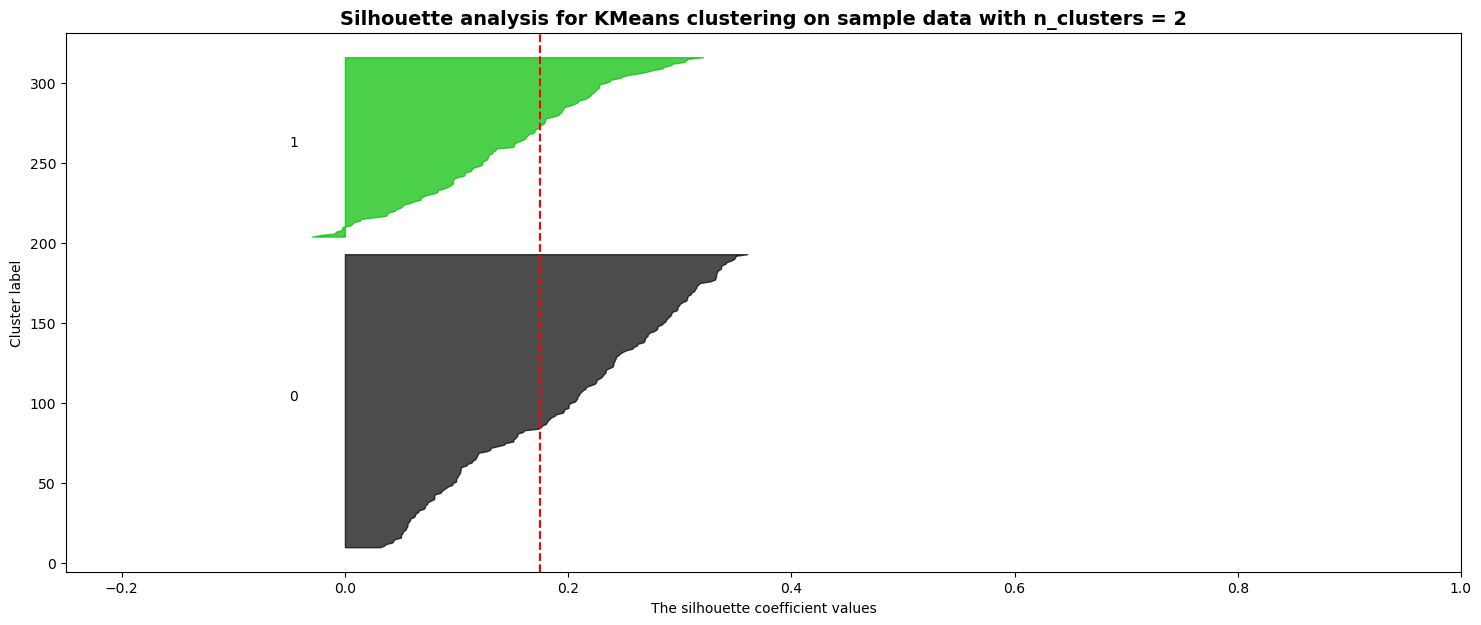

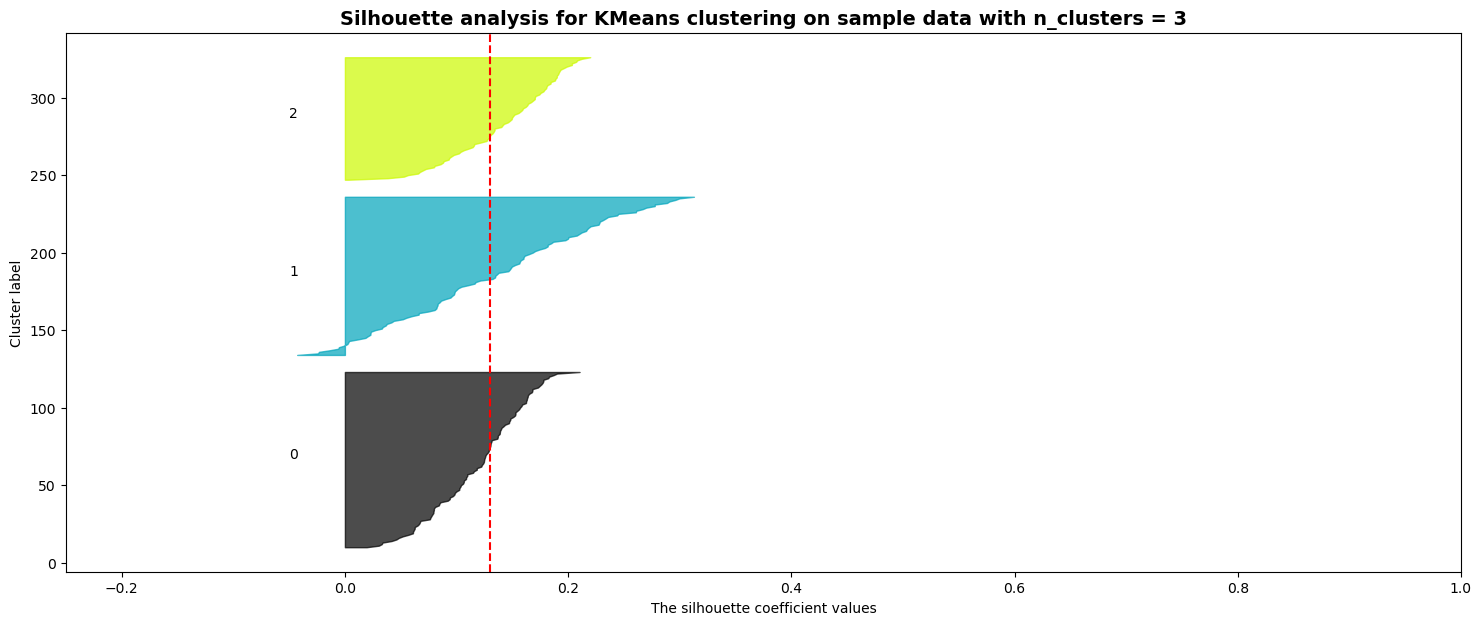

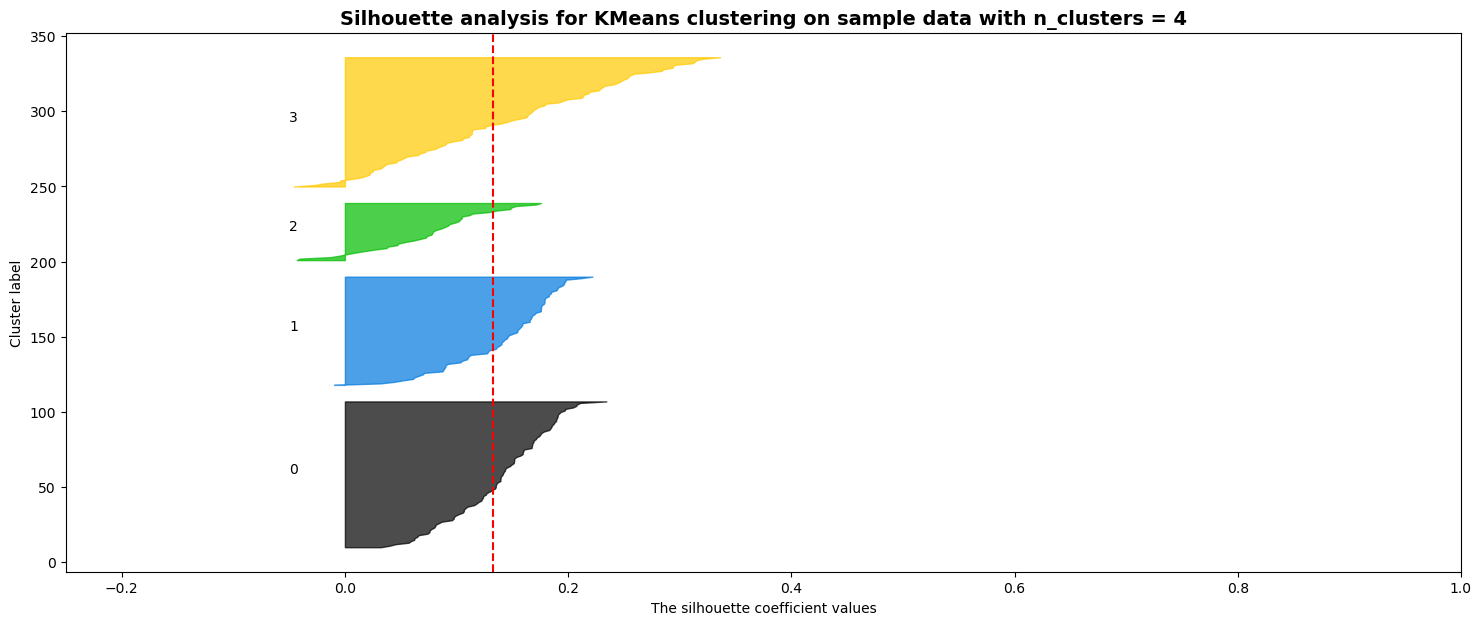

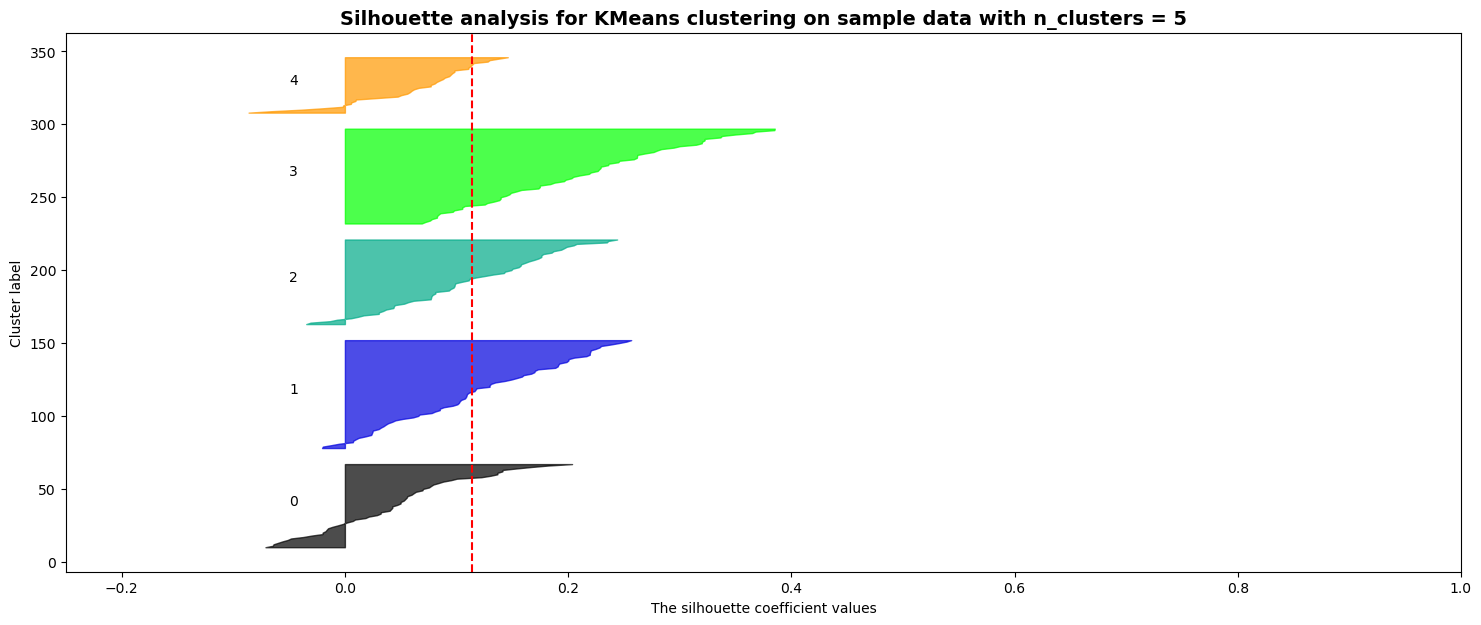

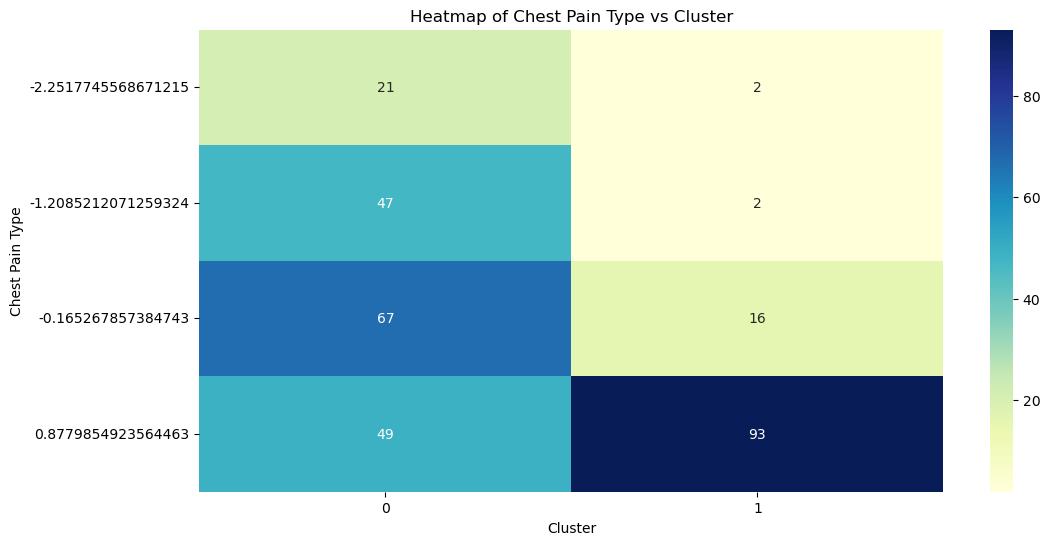

/tmp/ipykernel_727/154198602.py:67: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df2.pivot_table(values='chol', index='cp', columns='cluster', aggfunc='mean')


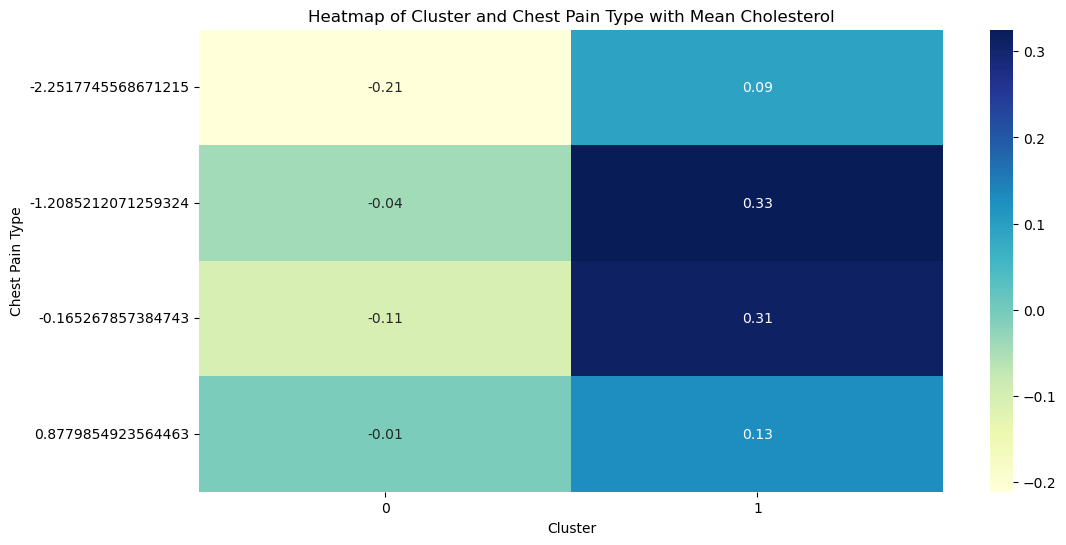

Cluster frequency:
 cluster
0    184
1    113
Name: count, dtype: int64


In [ ]:
# Let's do clustering
range_n_clusters = range(2, 6)
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, n_init=20, random_state=0)
    cluster_labels_km = km.fit_predict(clust_df_scaled)
    silhouette_avg_km = silhouette_score(clust_df_scaled, cluster_labels_km)
    # compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(clust_df_scaled, cluster_labels_km)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.25, 1])  # change this based on the silhouette range

    y_lower = 10

    for i in range(n_clusters):
        # aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_km == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # compute the new y_lower for next plot
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for various cluster")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg_km, color="red", linestyle="--")
    plt.title(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

# Finalize clustering with 2 clusters (optimal from silhouette analysis)
km = KMeans(n_clusters=2, n_init=20, random_state=0)
km.fit_predict(clust_df_scaled)
df2['cluster'] = km.labels_
df2['cluster'] = df2['cluster'].astype('category')

# Let's find the frequency of chest pain type (cp) and new cluster
plt.figure(figsize=(12, 6))
sns.heatmap(pd.crosstab(df2['cp'], df2['cluster']), annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Chest Pain Type vs Cluster')
plt.xlabel('Cluster')
plt.ylabel('Chest Pain Type')
plt.show()

# Let's plot for each chest pain type and cluster the mean cholesterol level
plt.figure(figsize=(12, 6))
pivot_table = df2.pivot_table(values='chol', index='cp', columns='cluster', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Heatmap of Cluster and Chest Pain Type with Mean Cholesterol')
plt.xlabel('Cluster')
plt.ylabel('Chest Pain Type')
plt.show()

km = KMeans(n_clusters=2, n_init=20, random_state=0)
cluster_labels = km.fit_predict(clust_df_scaled)
df2['cluster'] = cluster_labels
df2['cluster'] = df2['cluster'].astype('category')
print("Cluster frequency:\n", df2['cluster'].value_counts())

# Visualize Clusters using PCA
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform


## Question 8

In [ ]:
from sklearn.model_selection import train_test_split

# Predictors variables
X = df.drop(columns=["num"])
print(X.head())
# Response variables
y = df["num"]
print(y.head())

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=1, 
    stratify=y
    )

        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.948726  0.686202 -2.251775  0.757525 -0.264900  2.394438  1.016684   
1  1.392002  0.686202  0.877985  1.611220  0.760415 -0.417635  1.016684   
2  1.392002  0.686202  0.877985 -0.665300 -0.342283 -0.417635  1.016684   
3 -1.932564  0.686202 -0.165268 -0.096170  0.063974 -0.417635 -0.996749   
4 -1.489288 -1.457296 -1.208521 -0.096170 -0.825922 -0.417635  1.016684   

    thalach     exang   oldpeak     slope        ca      thal  
0  0.017197 -0.696631  1.087338  2.274579 -0.718306  0.653650  
1 -1.821905  1.435481  0.397182  0.649113  2.487269 -0.895552  
2 -0.902354  1.435481  1.346147  0.649113  1.418744  1.170051  
3  1.637359 -0.696631  2.122573  2.274579 -0.718306 -0.895552  
4  0.980537 -0.696631  0.310912 -0.976352 -0.718306 -0.895552  
0    1
1    0
2    0
3    1
4    1
Name: num, dtype: category
Categories (2, int64): [0, 1]


## Question 9

The two classifiers we have chosen are K-Nearest Neighbors (KNN) classification and Logistic Regression. KNN is non-parametric so it does not make assumptions about the data distribution. It also classifies data points based on their closest neighbors, so it can capture complex, non-linear relationships in the data. We also chose Logistic Regression because it works well with binary variables and as our response variable is binary, it would be useful.

## Question 10

The two metrics we have chosen are accuracy and AUC score because they provide a well-rounded evaluation of classifier performance. The accuracy score measures overall correctness, and a higher score is better as this means it correctly classified a larger proportion of instances. AUC score evaluates a classifier’s ability to distinguish between classes by measuring the area under the ROC curve, which plots the true positive rate against the false positive rate (sensitivity and specificity). A higher AUC score indicates better classification performance.

## Question 11

KNN Training - Optimal K Is Found

In [ ]:
from sklearn import neighbors
from sklearn import metrics

k_range = range(1, 8)
scores = [] 

for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append((metrics.accuracy_score(y_test, y_pred)))

    
plt.plot(k_range, scores)
plt.xlabel('K')
plt.ylabel('Test set accuracy')
plt.xticks(range(1,8))
plt.show()

In [ ]:
optimal_k = k_range[np.argmax(scores)]
print(f"The optimal K found was: {optimal_k}")

Logistic Regression - Optimal Threshold Is Found

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA

log = LogisticRegression()
log.fit(X_train, y_train)
pred_prob = log.predict_proba(X_test)

df = pd.DataFrame(
    data = {'prob': pred_prob[:,1], 'y_test': y_test}
    )

fpr, tpr, thresholds = roc_curve(df.y_test, df.prob)

plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

j_statistic = tpr - fpr
optimal_index = np.argmax(j_statistic)
optimal_threshold = thresholds[optimal_index]
df['y_pred'] = df.prob.apply(lambda x: 1 if x >= optimal_threshold else 0)

In [ ]:
print("The optimal threshold found was:", optimal_threshold)


## Question 12

PCA - Feature Extraction Applied to KNN

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test) 

knn = neighbors.KNeighborsClassifier(
    n_neighbors = 3,
    algorithm='brute'
    )
knn.fit(X_train_pca, y_train)

y_pred = knn.predict(X_test_pca)
y_pred_prob = knn.predict_proba(X_test_pca)[:, 1] 

## Question 13

In [ ]:
from sklearn.metrics import roc_auc_score

accuracy_knn = metrics.accuracy_score(y_test, pred3)
print ('KNN Accuracy : ', accuracy_knn)

auc_knn = roc_auc_score(y_test, pred3)
print('KNN AUC : ', auc_knn)

cm = confusion_matrix(df.y_test, df.y_pred)
total = sum(sum(cm))
accuracy = (cm[0,0]+cm[1,1])/total
print ('Logistic Accuracy : ', accuracy)

log_auc = roc_auc_score(df.y_test, df.prob)
print('Logistic AUC : ', log_auc)

accuracy_pca = metrics.accuracy_score(y_test, y_pred)
print ('PCA Accuracy : ', accuracy_pca)
auc_pca = roc_auc_score(y_test, y_pred_prob)
print('PCA AUC : ', auc_pca)

KNN Accuracy :  0.8555555555555555
KNN AUC :  0.8497023809523809
Logistic Accuracy :  0.8444444444444444
Logistic AUC :  0.9196428571428572
PCA Accuracy :  0.8555555555555555
PCA AUC :  0.8931051587301587


From our accuracy and AUC evaluations on KNN, Logistic Regression and PCA (applied to KNN), we can see that Logistic Regression was the most optimal classifier for our given dataset. The accuracy produced was 83.333% (2.222% lower than KNN & PCA accuracy) and AUC was equal to 91.964%. Even though PCA has higher accuracy and a very similar AUC, we will choose the classifier that has the highest AUC because that metric is most valuable given the dataset goal - predict patients who will have heart disease. We want to detect actual heart disease cases (true positives) and avoid false alarms (false positives) which AUC does both.

In regards to the impact PCA had on the performance of KNN, the accuracy did not change (both 85.556%) but the AUC increased by 4.34% which is a very good thing due to reasons discussed above.

## Question 14

In [ ]:
import statsmodels.api as sm

coef_df=pd.DataFrame(
    {"Feature": X.columns, 
     "Coefficient": log.coef_[0], 
     "Odds Ratio": np.exp(log.coef_[0])}
)
coef_df = coef_df.reindex(coef_df["Coefficient"].abs().sort_values(ascending=False).index)

print("Feature Importance")
print(coef_df)

X_const = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_const)
result = logit_model.fit()

p_values_sorted = result.pvalues.sort_values()

print("\nSorted Statistical Significance (P-values):")
print(p_values_sorted)


Feature Importance
     Feature  Coefficient  Odds Ratio
11        ca    -1.123034    0.325291
2         cp    -0.709867    0.491710
12      thal    -0.544820    0.579946
1        sex    -0.461293    0.630468
8      exang    -0.397061    0.672293
10     slope    -0.391661    0.675933
7    thalach     0.389600    1.476390
5        fbs     0.376469    1.457131
3   trestbps    -0.355015    0.701163
4       chol    -0.245491    0.782320
6    restecg    -0.176149    0.838493
9    oldpeak    -0.095393    0.909016
0        age    -0.009684    0.990362
Optimization terminated successfully.
         Current function value: 0.348057
         Iterations 7

Sorted Statistical Significance (P-values):
ca          0.000098
cp          0.002433
thal        0.024899
sex         0.055076
exang       0.069934
trestbps    0.079121
fbs         0.079605
slope       0.102957
thalach     0.135124
chol        0.295996
const       0.354218
restecg     0.416900
oldpeak     0.862765
age         0.937634
dtype: f

The variables with higher coefficients have stronger influence on prediction. The Odds Ratio tell us how a one-unit increase in each predictor variable affects the odds of having heart diesease. Odds Ratio > 1 increase and < 1 decrease. P-Values < 0.05 are statistically significant with predictors. The lower the p-value, the most important it is to the model. 

With the information we found the most important predictor variables are ca, cp, and thal as they have the highest absolute coefficients and are the only three statistically significant predicitors. This makes sense because ca represents the number of major vessels that show signs of diseases, cp represents type of chest pains the patient feels, and thal represents whether a patient has Thalassemia, a blood disorder affecting oxygen.

## Question 15

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

X_with_cluster = X.copy()
X_with_cluster['cluster'] = df2['cluster']
X_with_cluster['cluster'] = X_with_cluster['cluster'].astype('category')

X_with_cluster['cluster'] = X_with_cluster['cluster'].cat.codes


X_train, X_test, y_train, y_test = train_test_split(X_with_cluster, y, test_size=0.2, random_state=42)

knn_with_cluster = KNeighborsClassifier(n_neighbors=5)
knn_with_cluster.fit(X_train, y_train)
y_pred_cluster = knn_with_cluster.predict(X_test)
y_pred_cluster_prob = knn_with_cluster.predict_proba(X_test)[:, 1]


accuracy_clustered = accuracy_score(y_test, y_pred_cluster)
auc_clustered = roc_auc_score(y_test, y_pred_cluster_prob)

print("KNN with cluster feature - Accuracy:", accuracy_clustered)
print("KNN with cluster feature - AUC:", auc_clustered)


KNN with cluster feature - Accuracy: 0.85
KNN with cluster feature - AUC: 0.9467592592592592


To enhance our fourth classifier (KNN with PCA), we integrated the sub-group analysis used in question 7. Using KMeans clustering, we identified natural groupings within the dataset and added the resulting cluster labels as an additional feature to the original feature dataset. We then retrained the KNN classifier using this expanded space.

The revised model had an accuracy of 85.00% and an AUC of 0.947, compared to the PCA-enhanced KNN from Question 13, which had the same accuracy (85.56%) but a lower AUC (0.893). This substantial improvement in AUC suggests that incorporating the cluster information enabled the model to better distinguish between patients with and without heart disease. Overall, the use of sub-group analysis through clustering effectively improved the classifier’s performance by providing meaningful structural insight that was not captured through PCA alone.

## Question 16

Shreya Joshi - Questions #5-8, 15  
Aahuti Dave - Questions #1-4, 9-11  
Benjamin Siedel - Questions #12-14

## Question 17